# Loading in Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Family1.csv')
data.head()

,Unnamed: 0,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Threat_Binary,Threat
0,0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0
1,1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0
2,2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,...,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0
3,3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0
4,4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0


In [3]:
y = data['Threat']
x = data.copy(deep = True).drop(['Threat','Threat_Binary'],axis = 1)

In [4]:
class_counts = np.bincount(y)
print(class_counts)

[ 49548  59718  29068  29849  92141 105874 102195 107685 122573 237665
  81982]


In [5]:
class_dict = {}
for i in range(11):
  class_dict[i] = class_counts[i]

del class_dict[9]
class_dict

{0: 49548,
 1: 59718,
 2: 29068,
 3: 29849,
 4: 92141,
 5: 105874,
 6: 102195,
 7: 107685,
 8: 122573,
 10: 81982}

In [6]:
# Separate majority and minority classes
majority_class = data[data['Threat'] == 9]
minority_class = data[data['Threat'] != 9]

# Determine the number of samples to keep from the majority class
undersample_size = np.random.choice(list(class_dict.values()))

# Randomly select samples from the majority class
undersampled_majority = majority_class.sample(n=undersample_size, random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset to mix up the samples
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
y = undersampled_data['Threat']
x = undersampled_data.copy(deep = True).drop(['Threat','Threat_Binary'],axis = 1)

In [7]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(np.unique(y_train))
train_one_hot_labels = tf.one_hot(y_train, depth=11)
test_one_hot_labels = tf.one_hot(y_test, depth=11)
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(11, activation='softmax')  # 11 output neurons for 11 classes, softmax activation for multiclass classification
])

# Compile the model with categorical cross-entropy loss
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history = model.fit(X_train, train_one_hot_labels, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, test_one_hot_labels)
print(f'Test Accuracy: {test_accuracy}')


[ 0  1  2  3  4  5  6  7  8  9 10]
Epoch 1/10
17731/17731 [==============================] - 55s 3ms/step - loss: 0.3026 - accuracy: 0.8310 - val_loss: 0.2241 - val_accuracy: 0.8643
Epoch 2/10
17731/17731 [==============================] - 53s 3ms/step - loss: 0.2303 - accuracy: 0.8635 - val_loss: 0.1888 - val_accuracy: 0.8834
Epoch 3/10
17731/17731 [==============================] - 55s 3ms/step - loss: 0.2248 - accuracy: 0.8653 - val_loss: 0.2242 - val_accuracy: 0.8599
Epoch 4/10
17731/17731 [==============================] - 56s 3ms/step - loss: 0.2247 - accuracy: 0.8645 - val_loss: 0.2084 - val_accuracy: 0.8621
Epoch 5/10
17731/17731 [==============================] - 55s 3ms/step - loss: 0.2197 - accuracy: 0.8685 - val_loss: 0.1710 - val_accuracy: 0.8899
Epoch 6/10
17731/17731 [==============================] - 56s 3ms/step - loss: 0.2080 - accuracy: 0.8732 - val_loss: 0.1928 - val_accuracy: 0.8791
Epoch 7/10
17731/17731 [==============================] - 58s 3ms/step - loss: 0.20

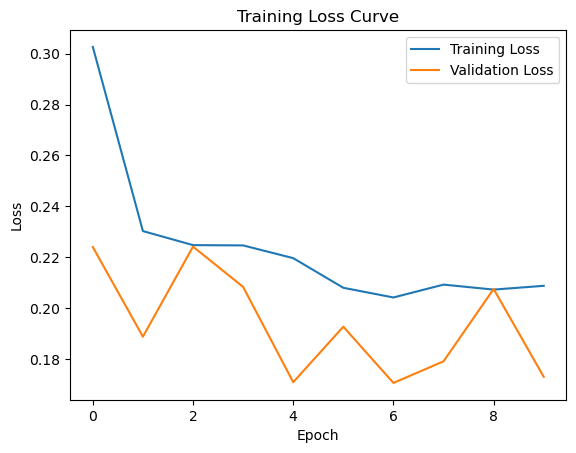

5541/5541 [==============================] - 8s 1ms/step


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming model and X_test, y_test are available

# Plot the training loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)




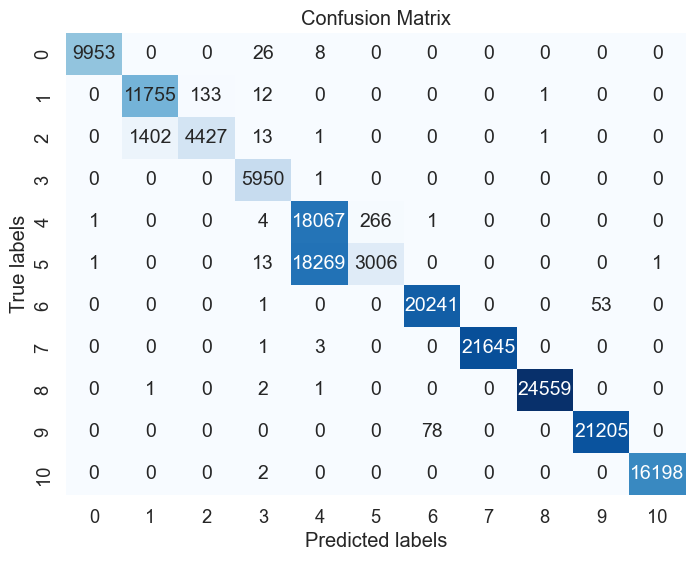

In [9]:
# get the matrix of right guesses for threat families
import seaborn as sns
from sklearn.metrics import confusion_matrix
#y_labs = [np.argmax(arr) for arr in y_pred_labels]
cm = confusion_matrix(y_test,y_pred_labels)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9987
           1       0.89      0.99      0.94     11901
           2       0.97      0.76      0.85      5844
           3       0.99      1.00      0.99      5951
           4       0.50      0.99      0.66     18339
           5       0.92      0.14      0.24     21290
           6       1.00      1.00      1.00     20295
           7       1.00      1.00      1.00     21649
           8       1.00      1.00      1.00     24563
           9       1.00      1.00      1.00     21283
          10       1.00      1.00      1.00     16200

    accuracy                           0.89    177302
   macro avg       0.93      0.90      0.88    177302
weighted avg       0.93      0.89      0.86    177302

